In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from scipy.stats import f_oneway
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import ttest_ind


from typing import List

# Our Coded Functions

# from hypothesistest import HypothesisTest as hp

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mobile_price_train.csv to mobile_price_train.csv


In [ ]:
mobile = pd.read_csv('mobile_price_train.csv')
m_p_t = mobile.copy()

In [ ]:
m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
m_p_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **Handling Outliers**

### **Plotting the destribution to identify any outliers**

#### **Box Plot**

In [ ]:
num_colms = [col for col in m_p_t.columns if m_p_t[col].nunique() > 2]


fig = sp.make_subplots(rows=5, cols=3, vertical_spacing = 0.14, horizontal_spacing = 0.05)

idx = 0

for r in range(1, 6):
  for c in range(1, 4):

    col = num_colms[idx]
    idx+=1

    trace = go.Box(x=m_p_t[col], orientation='h', boxpoints='suspectedoutliers', boxmean=True)

    fig.add_trace(trace, row=r, col=c)
    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(title_text=col, row=r, col=c)

fig.update_layout(
    title={
        'text': 'Relationship between Relevant Features and Price Range',
        'y': 0.989,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font' : {
            'color' : '#393646',
            'family' : 'Bold',
            'size' : 26
        }

    },

    showlegend = False,
    height = 800,
    width = 1200
)

fig.show()





#### **Violin Plot**

In [ ]:
num_colms = [col for col in m_p_t.columns if m_p_t[col].nunique() > 2]


fig = sp.make_subplots(rows=5, cols=3, vertical_spacing = 0.14, horizontal_spacing = 0.05)

idx = 0

for r in range(1, 6):
  for c in range(1, 4):

    col = num_colms[idx]
    idx+=1

    trace = go.Violin(x=m_p_t[col], meanline_visible=True, orientation='h', points='suspectedoutliers', box_visible=True)

    fig.add_trace(trace, row=r, col=c)

    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(title_text=col, row=r, col=c)

fig.update_layout(
    title={
        'text': 'Relationship between Relevant Features and Price Range',
        'y': 0.989,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font' : {
            'color' : '#393646',
            'family' : 'Bold',
            'size' : 26
        }

    },

    showlegend = False,
    height = 1000,
    width = 1200
)

fig.show()





#### **From the graph we can see only two columns has outliers. [fc, px_height] And they both are rightly sqewed. So we have to use IQR method to handle the outliers in these two columns**


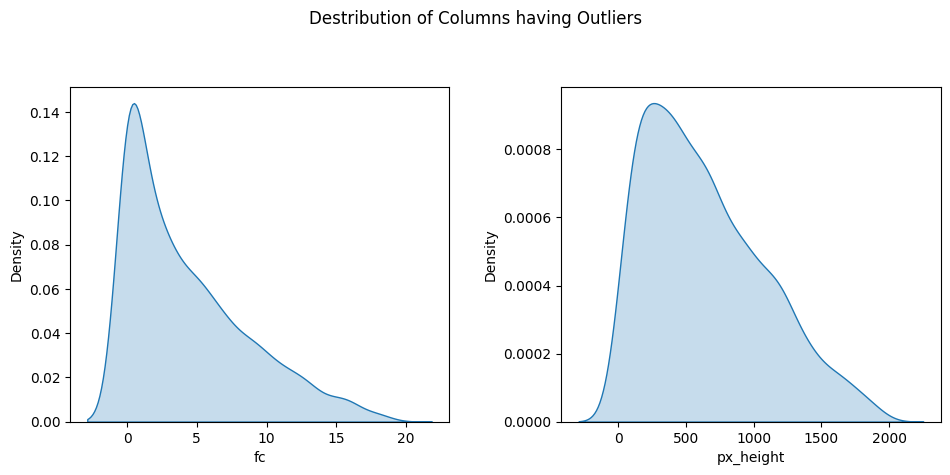

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Destribution of Columns having Outliers")

sns.kdeplot(data=m_p_t['fc'],ax = axes[0], label="FC", fill=True)


sns.kdeplot(data=m_p_t['px_height'],ax = axes[1], label="PX Height", fill=True)



plt.tight_layout(pad = 2.5)

plt.show()

### **Using Trimming Method**

In [ ]:
print(f"FC \n {m_p_t['fc'].describe()} \n\n PX Height \n{m_p_t['px_height'].describe()}")

FC 
 count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64 

 PX Height 
count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64


In [ ]:
def iqr_lim(col):

  perct_25 = col.quantile(0.25)
  perct_75 = col.quantile(0.75)

  IQR = perct_75 - perct_25

  upper_limit = perct_75 + (1.5 * IQR)
  lower_limit = perct_25 - (1.5 * IQR)

  return upper_limit, lower_limit

upper_fc, lower_fc               = iqr_lim(m_p_t['fc'])
upper_px_height, lower_px_height = iqr_lim(m_p_t['px_height'])

print(f"FC Upper Limit        : {upper_fc}")
print(f"FC Lower Limit        : {lower_fc}")
print(f"PX Height Upper Limit : {upper_px_height}")
print(f"PX Height Lower Limit : {lower_px_height}")


FC Upper Limit        : 16.0
FC Lower Limit        : -8.0
PX Height Upper Limit : 1944.0
PX Height Lower Limit : -714.0


#### **Showing the outliers rows**

In [ ]:
m_p_t[m_p_t.fc > upper_fc]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [ ]:
m_p_t[m_p_t.fc < lower_fc]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
m_p_t[m_p_t['px_height'] > upper_px_height]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [ ]:
m_p_t[m_p_t['px_height'] < lower_px_height]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


##### **Trimming FC**

In [ ]:
def trim_columns_plot(col, trim_col, name):

  plt.figure(figsize = (10, 5))

  plt.subplot(2, 2, 1)
  sns.kdeplot(data=col, label=name.upper(), fill=True)
  plt.xlabel(name.upper())

  plt.subplot(2, 2, 2)
  sns.boxplot(col,  orient = 'h')
  plt.xlabel(name.upper())


  plt.subplot(2, 2, 3)
  sns.kdeplot(data=trim_col, label=name.upper(), fill=True)
  plt.xlabel(f'Trim {name.upper()}')

  plt.subplot(2, 2, 4)
  ax = sns.boxplot(trim_col, orient = 'h')
  plt.xlabel(f'Trim {name.upper()}')

  plt.tight_layout(pad = 2.5)
  plt.show()


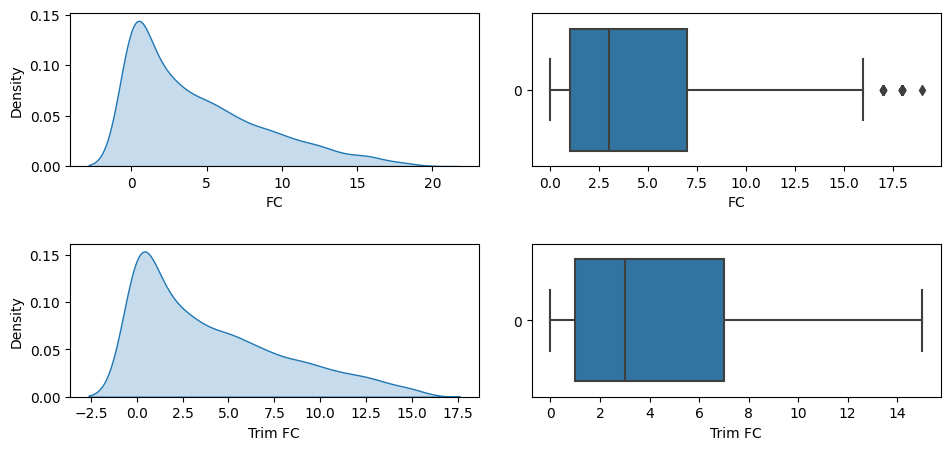

In [ ]:
trim_m_p_t_fc = m_p_t[m_p_t['fc'] < upper_fc]

trim_columns_plot(m_p_t.fc, trim_m_p_t_fc.fc, 'fc')

##### **Trimming PX Height**

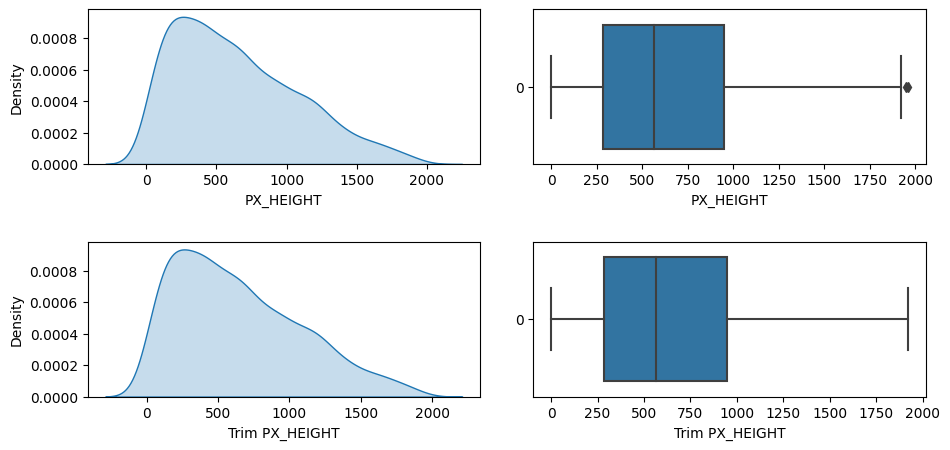

In [ ]:
trim_m_p_t_px_height = m_p_t[m_p_t['px_height'] < upper_px_height]
trim_columns_plot(m_p_t['px_height'], trim_m_p_t_px_height['px_height'], 'px_height')

### **Using Capping Method**

In [ ]:
capp_m_p_t_fc = m_p_t.copy()

capp_m_p_t_fc['fc'] = np.where(
    capp_m_p_t_fc['fc'] > upper_fc,
    upper_fc,
    np.where(
        capp_m_p_t_fc['fc'] < lower_fc,
        lower_fc,
        capp_m_p_t_fc['fc']
    )
)

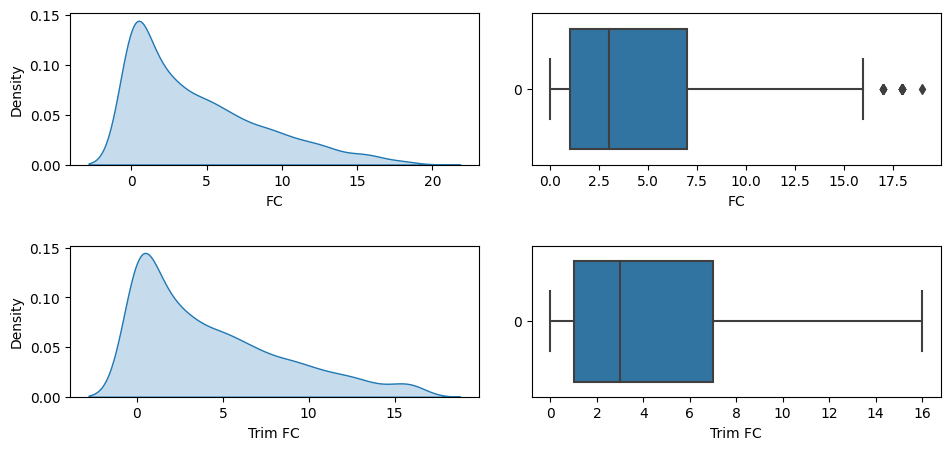

In [ ]:
trim_columns_plot(m_p_t['fc'], capp_m_p_t_fc['fc'], 'fc')

#### **Based on the above analysis conducted, it can be concluded that the capping method is useful for the FC column, as this feature contains a greater number of outliers. Conversely, trimming may be more appropriate for the Px_height feature, as it only contains two outliers.**

In [ ]:
# Cappint the FC columns

m_p_t['fc'] = np.where(
    m_p_t['fc'] > upper_fc,
    upper_fc,
    np.where(
        m_p_t['fc'] < lower_fc,
        lower_fc,
        m_p_t['fc']
    )
)

# Trimming the Px_height column

m_p_t_no_outlr = m_p_t[m_p_t['px_height'] < upper_px_height]


In [ ]:
fig = sp.make_subplots(rows=1, cols=2, vertical_spacing = 0.14, horizontal_spacing = 0.05)


trace1 = go.Box(x=m_p_t_no_outlr['fc'], orientation='h', boxpoints='suspectedoutliers', boxmean=True)

trace2 = go.Box(x=m_p_t_no_outlr['px_height'], orientation='h', boxpoints='suspectedoutliers', boxmean=True)


fig.add_trace(trace1, row=1, col=1)
fig.update_xaxes(title_text="FC", row=1, col=1)


fig.add_trace(trace2, row=1, col=2)
fig.update_xaxes(title_text="PX Height", row=1, col=2)


fig.update_yaxes(showticklabels=False)

fig.update_layout(

  title={
    'text': 'After Outliers Removal',
    'y': 0.96,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font' : {
        'color' : '#393646',
        'family' : 'Bold',
        'size' : 26
  }

},

showlegend = False,
height = 500,
width = 800
)

fig.show()





## **Using Min Max Scaling to standardized the numerical columns**

In [ ]:
# def min_max_scale(col):

#   min = np.min(col)
#   max = np.max(col)

#   standard = [(x - min) /(max - min) for x in col]

#   return standard


stdz_m_p_t = m_p_t_no_outlr.copy()

# for col in num_colms[:len(num_colms) - 1]:
#   stdz_m_p_t[col] = min_max_scale(stdz_m_p_t[col])

# print(m_p_t_no_outlr[num_colms].head())

# stdz_m_p_t[num_colms].head()



In [ ]:
m_p_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **Statistical Test to Select Features**

#### **Doing Anova Test to numeric columns to determine the significance of predicting price_rang**

#### **Creating our own ANOVA Function**

In [ ]:
def anova_one(*categories) -> List[float]:

  # Flatten all the categories into one 1D array
  # grand = np.array(categories)
  # grand = grand.flatten()
  grand = []

  for outer in categories:
    for elm in outer:
      grand.append(elm)

  num_of_condition = len(categories)
  total_num_of_data = len(grand)

  # for catg in categories:
  #   total_num_of_data += len(catg)

  df_bw = num_of_condition - 1
  df_wtn = total_num_of_data - num_of_condition

  # Critical Value
  f_crit = f.ppf(q=1-.05, dfn=df_bw, dfd=df_wtn)

  grand_mean = np.mean(grand)
  mean_arr = [np.mean(x) for x in categories]

  SST_numerator = grand

  # Sum of Squares Total Σ(x - x̄)^2
  SST = np.sum(np.apply_along_axis(lambda x: np.power(x - grand_mean, 2), 0, SST_numerator))

  # Sum of Squares Withing Σ(x1 - x̄1)^2 + Σ(x2 - x̄2)^2 + ... ... ... + Σ(xn - x̄n)^2
  SSW = 0
  temp = categories

  for catg in temp:

    catg_mean = np.mean(catg)

    SSW += np.sum(np.apply_along_axis(lambda x: np.power(x - catg_mean, 2), 0, catg))

  SSW = SSW

  # Sum of Squares Between
  SSBW = SST - SSW

  # Mean Squares Between
  MSBW =SSBW / df_bw

  # Mean Squares Within
  MSW = SSW / df_wtn

  f_stat = MSBW / MSW


  p_value = f.sf(f_stat, df_bw, df_wtn)

  return f_crit, f_stat, p_value



anova_one([1, 2, 5], [2, 4, 2], [2, 3, 4])



(5.143252849784718, 0.04999999999999982, 0.9516215013591449)

#### **Testing the Accuracy of my function with states.f_oneway**

In [ ]:
feature = 'battery_power'
col_0 = stdz_m_p_t[m_p_t["price_range"] == 0][feature]
col_1 = stdz_m_p_t[m_p_t["price_range"] == 1][feature]
col_2 = stdz_m_p_t[m_p_t["price_range"] == 2][feature]
col_3 = stdz_m_p_t[m_p_t["price_range"] == 3][feature]

# # print(len(col_0), len(col_1), len(col_2), len(col_3))
# # g = np.array([col_), col_1[0], col_2, col_3])
# # g = g.flatten()
# # g

# x = col_0
# y = col_1

# c = np.array([ x, y, col_2, col_3])
# z = []
# for outer in c:
#   for x in outer:
#     z.append(x)


# z = np.array(z)
# z.shape


<ipython-input-119-934dbd3045a9>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-119-934dbd3045a9>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-119-934dbd3045a9>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-119-934dbd3045a9>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
f_oneway(col_0, col_1, col_2, col_3)

F_onewayResult(statistic=31.513495036295836, pvalue=6.713993985856411e-20)

In [ ]:
anova_one(col_0, col_1, col_2, col_3)

(2.6093652175723445, 31.513495036295783, 6.713993985856411e-20)

#### **Implementing Anova test with both our and built in functions and comparing it**

In [ ]:
# Extracting the numerical columns
n = len(num_colms)

HC_anova = []
anova = []

for col in num_colms[ :n - 1]:

  col_0 = stdz_m_p_t[m_p_t["price_range"] == 0][col]
  col_1 = stdz_m_p_t[m_p_t["price_range"] == 1][col]
  col_2 = stdz_m_p_t[m_p_t["price_range"] == 2][col]
  col_3 = stdz_m_p_t[m_p_t["price_range"] == 3][col]

  f_stat, p_value = f_oneway(col_0, col_1, col_2, col_3)

  anova.append([col, f_stat, p_value])

  _, f_stat, p_value = anova_one(col_0, col_1, col_2, col_3)

  HC_anova.append([col, f_stat, p_value])




<ipython-input-122-e2782bf37073>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-122-e2782bf37073>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-122-e2782bf37073>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-122-e2782bf37073>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### **Comparing my anova function to original anova**

In [ ]:
for i in range(len(anova)):
  print(anova[i][0])
  print(f"stat = {anova[i][1]}, p_value = {anova[i][2]}")
  print(f"my_stat = {HC_anova[i][1]}, my_p_value = {HC_anova[i][2]}")
  print()

battery_power
stat = 31.513495036295836, p_value = 6.713993985856411e-20
my_stat = 31.513495036295783, my_p_value = 6.713993985856411e-20

clock_speed
stat = 0.491978773388441, p_value = 0.6878760540629911
my_stat = 0.49197877338861495, my_p_value = 0.6878760540628887

fc
stat = 0.8412347075208211, p_value = 0.47119535676382607
my_stat = 0.8412347075208505, my_p_value = 0.47119535676382607

int_memory
stat = 2.9131423673657735, p_value = 0.03321699701567197
my_stat = 2.913142367365822, my_p_value = 0.033216997015667736

m_dep
stat = 1.5181696567539429, p_value = 0.20783366859699934
my_stat = 1.5181696567539407, my_p_value = 0.20783366859699934

mobile_wt
stat = 3.57796808786005, p_value = 0.013415544766487946
my_stat = 3.5779680878599414, my_p_value = 0.013415544766489661

n_cores
stat = 2.576356312579159, p_value = 0.052259228034057296
my_stat = 2.5763563125790894, my_p_value = 0.05225922803406589

pc
stat = 0.8581096270002767, p_value = 0.4621872664942891
my_stat = 0.8581096270003586

### **Doing Chi Square Test to categorical columns to determine the significance of predicting price_range**

#### **Creating our Own Chi Square Function**

In [ ]:
def cross_tab(ind, dep):

  # Fetching the rows and columns for the table

  new_df = pd.DataFrame({
      'ind' : ind,
      'dep' : dep
  })


  rows = ind.unique()
  cols = dep.unique()
  cols.sort()
  cols

  table = []

  for row in rows:
    c = []
    for col in cols:
      slices = len(new_df[(new_df['ind'] == row) & (new_df['dep'] == col)])
      c.append(slices)

    table.append(c.copy())
    c = c.clear()

  table = pd.DataFrame(table, columns = cols, index = rows)

  return table



def to_expected(observe):

  cols = observe.columns
  rows = observe.index

  grand_ttl = np.sum(np.sum(observe))

  expected = observe.copy()

  for row in rows:
    for col in cols:
      row_ttl = np.sum(observe.loc[row])
      col_ttl = np.sum(observe[col])

      expected.loc[row, col] = (row_ttl * col_ttl) / grand_ttl

  return expected

# print(to_expected(observe))


def chi_2_t(observed, expected):

  chi_square = np.sum(np.sum(np.power(observe - expected, 2) / expected))



  row_count = len(observed.index) - 1
  col_count = len(observed.columns) - 1

  df = row_count * col_count

  p_value = 1 - chi2.cdf(chi_square, df)

  return chi_square, p_value



### **Comparing my Chi2 This is formatted as code functions with built in functions**




#### Table Compare

In [ ]:
# My functions
HC_observe = cross_tab(stdz_m_p_t['dual_sim'], stdz_m_p_t['price_range'])
HC_expected = to_expected(HC_observe)

# Built in functions
observe = pd.crosstab(stdz_m_p_t['dual_sim'], stdz_m_p_t['price_range'])
expected = chi2_contingency(observe)[3]

expected = pd.DataFrame(expected, columns = observe.columns, index = observe.index)
print("Ovserve:\n ")
print(f"Hard Code:\n{HC_observe}")
print(f"\nBuilt IN:\n{observe}")

print(f"\nExpected: ")
print(f"\nHard Code:\n{HC_expected}")
print(f"\nBuilt IN:\n{expected}")


Ovserve:
 
Hard Code:
     0    1    2    3
0  250  245  250  235
1  250  255  249  264

Built IN:
price_range    0    1    2    3
dual_sim                       
0            250  245  250  235
1            250  255  249  264

Expected: 

Hard Code:
            0           1           2           3
0  245.245245  245.245245  244.754755  244.754755
1  254.754755  254.754755  254.245245  254.245245

Built IN:
price_range           0           1           2           3
dual_sim                                                   
0            245.245245  245.245245  244.754755  244.754755
1            254.754755  254.754755  254.245245  254.245245


#### **Chi Square value and p value compare**

In [ ]:
chi_square,p_values, _, _ = chi2_contingency(HC_observe)
HC_chi_square, HC_p_values = chi_2_t(HC_observe, HC_expected)


print(f"Built in chi_2  = {chi_square},   Built in p value  = {p_values}")
print(f"Hard Code chi 2 = {HC_chi_square},   Hard Code p value = {HC_p_values}")


Built in chi_2  = 1.1650734607420992,   Built in p value  = 0.7613927398347171
Hard Code chi 2 = 1.1650734607420992,   Hard Code p value = 0.7613927398347171


#### **Implementing Chi square test with both our and built in functions and comparing it**




In [ ]:
# Fetching the categorical columns
catg_colms = [col for col in stdz_m_p_t.columns if stdz_m_p_t[col].nunique() == 2]
n = len(catg_colms)

HC_chi_2 = []
chi_2 = []

for col in catg_colms:

  observe = cross_tab(stdz_m_p_t[col], stdz_m_p_t['price_range'])
  expected = to_expected(observe)

  chi_square,p_value, _, _ = chi2_contingency(observe)
  HC_chi_square, HC_p_values = chi_2_t(observe, expected)

  chi_2.append([col, chi_square, p_value])
  HC_chi_2.append([col, HC_chi_square, HC_p_values])

for i in range(len(chi_2)):
  print(HC_chi_2[i][0])
  print(f"stat    = {chi_2[i][1]},  p_value    = {chi_2[i][2]}")
  print(f"my_stat = {HC_chi_2[i][1]}, my_p_value = {HC_chi_2[i][2]}")
  print()






blue
stat    = 1.379985190664331,  p_value    = 0.7102329471672442
my_stat = 1.379985190664331, my_p_value = 0.7102329471672442

dual_sim
stat    = 1.1650734607420992,  p_value    = 0.7613927398347171
my_stat = 1.1650734607420992, my_p_value = 0.7613927398347171

four_g
stat    = 3.1839157849182875,  p_value    = 0.3641289090432397
my_stat = 3.183915784918287, my_p_value = 0.3641289090432396

three_g
stat    = 1.3194817939999668,  p_value    = 0.7245122123530843
my_stat = 1.3194817939999668, my_p_value = 0.7245122123530843

touch_screen
stat    = 3.9919597018810995,  p_value    = 0.26233364677575377
my_stat = 3.991959701881099, my_p_value = 0.262333646775754

wifi
stat    = 0.8039541146769342,  p_value    = 0.8485210293812833
my_stat = 0.8039541146769342, my_p_value = 0.8485210293812833



In [ ]:
m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Feature Selection Based on P Value**








In [ ]:
p_values_num = {anova[i][0] : anova[i][2] for i in range(len(anova))}
p_values_catg = {HC_chi_2[i][0] : HC_chi_2[i][2] for i in range(len(HC_chi_2))}

p_values  = dict(p_values_num)
p_values.update(p_values_catg)

sort_p_values = sorted(p_values.items(), key = lambda x: x[1])
sort_p_values

# footballers_goals = {'Eusebio': 120, 'Cruyff': 104, 'Pele': 150, 'Ronaldo': 132, 'Messi': 125}

# sorted_footballers_by_goals = sorted(footballers_goals.items(), key=lambda x:x[1])
# print(sorted_footballers_by_goals)

[('ram', 0.0),
 ('battery_power', 6.713993985856411e-20),
 ('px_width', 2.881567837380335e-14),
 ('px_height', 2.6162526915481838e-12),
 ('mobile_wt', 0.013415544766487946),
 ('int_memory', 0.03321699701567197),
 ('n_cores', 0.052259228034057296),
 ('sc_h', 0.0828023294418198),
 ('sc_w', 0.17076307782254166),
 ('talk_time', 0.18144519465488843),
 ('m_dep', 0.20783366859699934),
 ('touch_screen', 0.262333646775754),
 ('four_g', 0.3641289090432396),
 ('pc', 0.4621872664942891),
 ('fc', 0.47119535676382607),
 ('clock_speed', 0.6878760540629911),
 ('blue', 0.7102329471672442),
 ('three_g', 0.7245122123530843),
 ('dual_sim', 0.7613927398347171),
 ('wifi', 0.8485210293812833)]

#### **We Have to select the top features with the smallest p-values for training the model**

#### **Ram and battery_power have the smallest p-values, indicating a strong relationship with the target variable**

#### **Px_width and px_height also have small p-values and are statistically significant, but to a slightly lesser extent**

#### **Other features have larger p-values and may not have a strong relationship with the target variable**

#### **As a result we select ram, battery_power, px_width, px_height, mobile_wt, int_memory , n_cores and sc_h  as our top features for training the model**

In [ ]:
feature_to_work_with = [f[0] for f in sort_p_values[:4]]

feature_to_work_with

['ram', 'battery_power', 'px_width', 'px_height']

In [ ]:
stdz_m_p_t[num_colms].head(15)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1.0,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0.0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2.0,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0.0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13.0,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
5,1859,0.5,3.0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1
6,1821,1.7,4.0,10,0.8,139,8,10,381,1018,3220,13,8,18,3
7,1954,0.5,0.0,24,0.8,187,4,0,512,1149,700,16,3,5,0
8,1445,0.5,0.0,53,0.7,174,7,14,386,836,1099,17,1,20,0
9,509,0.6,2.0,9,0.1,93,5,15,1137,1224,513,19,10,12,0


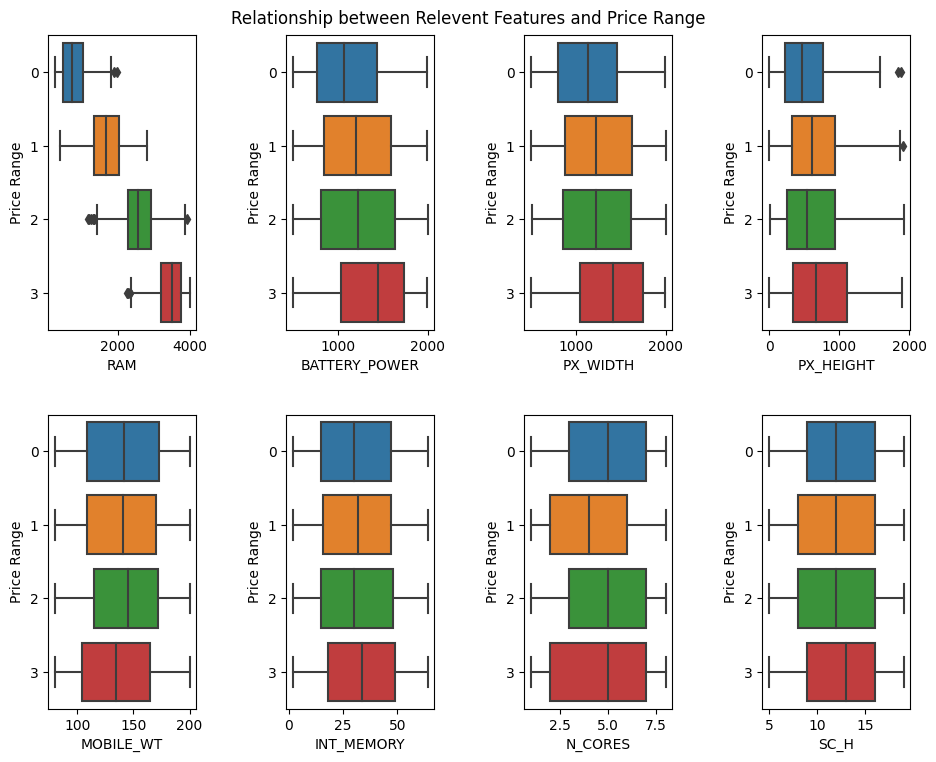

In [ ]:
relevent_colms = ['ram' , 'battery_power' , 'px_width' ,'px_height' , 'mobile_wt' , 'int_memory' , 'n_cores', 'sc_h']

fig, axes = plt.subplots(2, 4, figsize=(10, 8))

idx = 0

for r in range(2):
  for c in range(4):

    col = relevent_colms[idx]
    idx+=1

    battery_0 = m_p_t_no_outlr[m_p_t_no_outlr.price_range == 0][col]
    battery_1 = m_p_t_no_outlr[m_p_t_no_outlr.price_range == 1][col]
    battery_2 = m_p_t_no_outlr[m_p_t_no_outlr.price_range == 2][col]
    battery_3 = m_p_t_no_outlr[m_p_t_no_outlr.price_range == 3][col]

    data = [battery_0, battery_1, battery_2, battery_3]


    sns.boxplot(data,ax = axes[r, c], orient = 'h')

    # axes[r, c].title('Battery Power by Price Range')
    axes[r, c].set_ylabel('Price Range')
    axes[r, c].set_xlabel(col.upper())

plt.tight_layout(pad = 3.0)
fig.suptitle('Relationship between Relevent Features and Price Range')

plt.show()

#### **Before Standardization**


In [ ]:
def box_plot(m_p_t, relevent_colms) -> None:
  fig = sp.make_subplots(rows=2, cols=4, vertical_spacing = 0.14, horizontal_spacing = 0.05)

  idx = 0

  for r in range(1, 3):
    for c in range(1, 5):

      col = relevent_colms[idx]
      idx+=1


      trace1 = go.Box(x=m_p_t[m_p_t.price_range == 0][col], name='0', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace2 = go.Box(x=m_p_t[m_p_t.price_range == 1][col], name='1', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace3 = go.Box(x=m_p_t[m_p_t.price_range == 2][col], name='2', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace4 = go.Box(x=m_p_t[m_p_t.price_range == 3][col], name='3', notched=True, orientation='h', boxpoints='suspectedoutliers')

      fig.add_trace(trace1, row=r, col=c)
      fig.add_trace(trace2, row=r, col=c)
      fig.add_trace(trace3, row=r, col=c)
      fig.add_trace(trace4, row=r, col=c)

      fig.update_yaxes(title_text='Price Range', row=r, col=c)
      fig.update_xaxes(title_text=col, row=r, col=c)

  fig.update_layout(
      title={
          'text': 'Relationship between Relevant Features and Price Range',
          'y': 0.989,
          'x': 0.5,
          'xanchor': 'center',
          'yanchor': 'top',
          'font' : {
              'color' : '#393646',
              'family' : 'Bold',
              'size' : 26
          }

      },
      margin=dict(l=50, r=50, t=50, b=50),
      showlegend = False,
      height = 800,
      width = 1200
  )

  fig.show()

box_plot(stdz_m_p_t, relevent_colms)


### **Handling the Outliers in ['ram', 'px_height'] Using Capping Method**

In [ ]:
categories = [0, 1, 2, 3]

for col in ['ram', 'px_height']:
    for cat in categories:

        # Subset of the data for the current category and column
        subset = stdz_m_p_t[stdz_m_p_t['price_range'] == cat][col]

        q1 = subset.quantile(0.25)
        q3 = subset.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Using Capping Method
        subset[subset < lower_bound] = lower_bound
        subset[subset > upper_bound] = upper_bound

        stdz_m_p_t.loc[m_p_t_no_outlr['price_range'] == cat, col] = subset


In [ ]:
box_plot(stdz_m_p_t, relevent_colms)

## **Checking the Correlatoin between each pair of columns**

In [ ]:
# relevent_colms

# size = len(relevent_colms)

# cols_to_work = relevent_colms

# cols_to_work.append("price_range")

# rel_colms_corr = stdz_m_p_t[relevent_colms]

# fig = px.scatter_matrix(rel_colms_corr, dimensions = relevent_colms[ : size - 1], color = 'price_range')

# fig.update_layout(
#     title='Correlation',
#     dragmode='select',
#     width=2000,
#     height=1000,
#     hovermode='closest',
# )

# fig.show()

#### **As there is no linear relationship between the numeric columns, it means that they are not correlated with each other. This indicate that each feature provides unique information about the target variable, and they are not redundant**

In [ ]:
m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
relevent_colms

['ram',
 'battery_power',
 'px_width',
 'px_height',
 'mobile_wt',
 'int_memory',
 'n_cores',
 'sc_h']

# **Creating a model to predict the price_range based on ram, battery_power, px_width, px_height using Decision Tree**

## **Coding my model from scratch**

#### **Node Class**

In [ ]:
class Node():

  def __init__(self, f_idx = None, threshold = None, left = None, right = None, IG = None,  value = None,):

    # Decision Node
    self.f_idx = f_idx
    self.threshold = threshold
    self.IG = IG
    self.left = left
    self.right = right


    # Leaf Node
    self.value = value


#### **Decision Tree Class**

In [ ]:
class Decision_tree():

  def __init__(self, min_sample_split = 2, max_depth = 2):

    self.root = None

    self.min_sample_split = min_sample_split
    self.max_depth = max_depth


  def make_tree(self, df, cur_depth = 0):

    X, Y = df[:, : -1], df[:, -1]

    n_samp, n_feature = np.shape(X)

    if n_samp >= self.min_sample_split and cur_depth <= self.max_depth:

      best_split = self.get_require_split(df, n_samp, n_feature)

      if best_split['IG'] > 0:

        left = self.make_tree(best_split['left_df'], cur_depth + 1)
        right = self.make_tree(best_split['right_df'], cur_depth + 1)

        return Node(best_split['f_idx'], best_split['threshold'], left, right, best_split['IG'])

    leaf_node = self.get_leaf_val(Y)

    return Node(value = leaf_node)

  def get_require_split(self, df, n_samp, n_feature):

    best_split = {}

    max_IG = -float("inf")

    for f_idx in range(n_feature):

      f_values = df[:, f_idx]
      n_threshholds = np.unique(f_values)

      for threshold in n_threshholds:

        left_df = np.array([r for r in df if r[f_idx] <= threshold])
        right_df = np.array([r for r in df if r[f_idx] > threshold])

        if len(left_df) > 0 and len(right_df) > 0:

          parent_y, l_child_y, r_child_y = df[:, -1], left_df[:, -1], right_df[:, -1]
          #
          cur_IG = self.information_gain(parent_y, l_child_y, r_child_y)

          if cur_IG > max_IG:

            max_IG = cur_IG

            best_split['f_idx'] = f_idx
            best_split['threshold'] = threshold
            best_split['left_df'] = left_df
            best_split['right_df'] = right_df
            best_split['IG'] = cur_IG

    return best_split

  def information_gain(self, parent, l_child, r_child):

    l_weight = len(l_child) / len(parent)
    r_weight = len(r_child) / len(parent)

    G_parent = self.gini_index(parent)
    G_l_child = self.gini_index(l_child)
    G_r_child = self.gini_index(r_child)

    IG = G_parent - (l_weight * G_l_child + r_weight * G_r_child)

    return IG

  def gini_index(self, target):

    categories = np.unique(target)

    gini_index = 0

    for catg in categories:
      p = len(target[target == catg]) / len(target)
      gini_index += p**2

    return 1 - gini_index


  def get_leaf_val(self, Y):
    Y = list(Y)

    return max(Y, key = Y.count)

  def fit(self, X, Y):
    df = np.concatenate((X, Y), axis = 1)
    self.root = self.make_tree(df)

  def predict(self, X):
    pred = [self.get_pred(x, self.root) for x in X]
    return pred

  def get_pred(self, x, root):

    if root.value != None:
      return root.value

    f_val = x[root.f_idx]

    if f_val <= root.threshold:
      return self.get_pred(x, root.left)
    else:
      return self.get_pred(x, root.right)





In [ ]:
data = stdz_m_p_t[['ram', 'battery_power', 'px_width', 'px_height', 'price_range']]

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)




In [ ]:
model = Decision_tree(min_sample_split=2, max_depth=7)
model.fit(X_train,Y_train)

In [ ]:
stdz_m_p_t[['ram', 'battery_power', 'px_width', 'px_height', 'price_range']].head()

,ram,battery_power,px_width,px_height,price_range
0,2549.0,842,756,20.0,1
1,2631.0,1021,1988,905.0,2
2,2603.0,563,1716,1263.0,2
3,2769.0,615,1786,1216.0,2
4,1411.0,1821,1212,1208.0,1


In [ ]:
input = [2631.0, 1021, 1988, 905]

In [ ]:
Y_pred = model.predict([input])
Y_pred

[2.0]

In [ ]:
for x in range(len(Y_test[:100])):
  print(Y_test[x], end = ' ')
  if x % 10 == 0 and x != 0:
    print()



[1] [2] [2] [3] [2] [2] [1] [0] [1] [0] [2] 
[2] [3] [0] [1] [3] [1] [2] [2] [3] [0] 
[2] [0] [0] [3] [0] [0] [0] [0] [1] [3] 
[2] [0] [2] [1] [2] [0] [1] [0] [0] [1] 
[1] [0] [2] [3] [1] [3] [0] [1] [0] [2] 
[2] [2] [0] [3] [1] [3] [3] [3] [1] [3] 
[3] [2] [0] [2] [0] [3] [3] [3] [1] [0] 
[0] [2] [0] [2] [3] [1] [3] [1] [3] [3] 
[0] [2] [0] [0] [0] [3] [2] [0] [2] [2] 
[1] [0] [0] [1] [1] [3] [3] [0] [3] 

In [ ]:
for x in range(len(Y_pred[:100])):
  print(Y_test[x], end = ' ')
  if x % 10 == 0 and x != 0:
    print()

[1] [2] [2] [3] [2] [2] [1] [0] [1] [0] [2] 
[2] [3] [0] [1] [3] [1] [2] [2] [3] [0] 
[2] [0] [0] [3] [0] [0] [0] [0] [1] [3] 
[2] [0] [2] [1] [2] [0] [1] [0] [0] [1] 
[1] [0] [2] [3] [1] [3] [0] [1] [0] [2] 
[2] [2] [0] [3] [1] [3] [3] [3] [1] [3] 
[3] [2] [0] [2] [0] [3] [3] [3] [1] [0] 
[0] [2] [0] [2] [3] [1] [3] [1] [3] [3] 
[0] [2] [0] [0] [0] [3] [2] [0] [2] [2] 
[1] [0] [0] [1] [1] [3] [3] [0] [3] 

In [ ]:
X_test[:10, :]

array([[1026., 1331., 1226., 1109.],
       [2424., 1660.,  569.,  440.],
       [2547., 1187., 1125.,  215.],
       [3969.,  788., 1161.,   42.],
       [1955., 1872., 1259.,  459.],
       [2481., 1820., 1884.,  202.],
       [2330.,  912., 1053.,  329.],
       [ 558., 1273., 1399.,  485.],
       [1280., 1392., 1098.,  482.],
       [ 513.,  509., 1224., 1137.]])

In [ ]:
model.predict([[1026., 1331., 1226., 1109]])


[0.0]

### **Comparing the Accuracy of my model vs sklearn model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=2)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred2 = clf.predict(X_test)

#### **Sklearn**

In [ ]:
accuracy_score(Y_test, y_pred2)

0.8425

#### Ours

In [ ]:
accuracy_score(Y_test, Y_pred)

0.8475

# **Hypothesis Test**

In [ ]:
stdz_m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20.0,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905.0,1988,2631.0,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263.0,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216.0,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208.0,1212,1411.0,8,2,15,1,1,0,1


## **Is the mean battery power of mobile phones with dual SIM slots significantly different from the mean battery power of mobile phones without dual SIM slots?**

In [ ]:
bp_dual_sim = stdz_m_p_t[stdz_m_p_t.dual_sim == 1]['battery_power']
bp_sing_sim = stdz_m_p_t[stdz_m_p_t.dual_sim == 0]['battery_power']

#### **Doing two t test**

In [ ]:
def two_samp_t_test(catg1, catg2, tail = 2):

  n1 = len(catg1)
  n2 = len(catg2)

  x1 = np.mean(catg1)
  x2 = np.mean(catg2)

  s1 = np.std(catg1)
  s2 = np.std(catg2)


  numerator = x1 - x2
  dnumarator = np.sqrt((np.power(s1, 2) / n1) + (np.power(s2, 2) / n2))

  z = numerator / dnumarator


  p_value = 1 - norm.cdf(abs(z))

  if tail == 2: p_value *= 2

  return z, p_value






### **Comparing my function to built in function**

In [ ]:
test_stat, p_val = two_samp_t_test(bp_dual_sim, bp_sing_sim)

print(f"Ttest_indResult(statistic={test_stat}, pvalue={p_val})")


Ttest_indResult(statistic=-1.8830319065537133, pvalue=0.05969604411395424)


In [ ]:
ttest_ind(a = bp_dual_sim, b = bp_sing_sim)

Ttest_indResult(statistic=-1.8814032154294624, pvalue=0.060062516535900105)

## **Is the mean weight of mobile phones with touch screens significantly different from the mean weight of mobile phones without touch screens?**


In [ ]:
wth_touch_scrn =  stdz_m_p_t[stdz_m_p_t.touch_screen == 1]['mobile_wt']
wthout_touch_scrn =  stdz_m_p_t[stdz_m_p_t.touch_screen == 0]['mobile_wt']

### **Comparing my function to built in function**

In [ ]:
test_stat, p_val =  two_samp_t_test(wth_touch_scrn, wthout_touch_scrn)

print(f"Ttest_indResult(statistic={test_stat}, pvalue={p_val})")


Ttest_indResult(statistic=-0.6476929143088618, pvalue=0.5171835880597975)


In [ ]:
ttest_ind(a = wth_touch_scrn, b = wthout_touch_scrn)

Ttest_indResult(statistic=-0.6472626009218954, pvalue=0.5175364329670469)

# **My functions**

In [ ]:
def mean(col):

  col = [v for v in col if v is not None]

  if not col:
      return None

  return np.sum(col) / len(col)


def median(col):

  col = [v for v in col if v is not None]

  if not col:
      return None

  sorted_values = sorted(col)

  n = len(sorted_values)

  middle = n // 2

  if n % 2 == 0:
      return (sorted_values[middle - 1] + sorted_values[middle]) // 2
  else:
      return sorted_values[middle]


def std_var(col, type = "std"):

  col = [v for v in col if v is not None]

  if not col:
      return None

  mean = np.sum(col) / len(col)

  squared_diffs = [(v - mean)**2 for v in col]

  variance = sum(squared_diffs) / len(squared_diffs)

  if type == "var":

    return variance

  return np.sqrt(variance)


In [ ]:
arr = np.array([3, 3, 4, 6, 5, 6, 9])

np.median(arr)

5.0

In [ ]:
print(median(arr))

5


In [ ]:
np.std(wth_touch_scrn)

35.865986324446325

In [ ]:
print(std_var(wth_touch_scrn))

35.86598632444637


In [ ]:
!cp drive/MyDrive/Collab_Notebooks/Hypothesis.py

cp: missing destination file operand after 'drive/MyDrive/Collab_Notebooks/Hypothesis.py'
Try 'cp --help' for more information.





**How many phones in the dataset have a dual_sim feature?**



In [ ]:
dual_sim = mobile[mobile['dual_sim'] == 1]
num_dual_sim_phones = len(dual_sim)
print("Total Number of phone with Duel Sim:", num_dual_sim_phones)

Total Number of phone with Duel Sim: 1019


**What is the average clock speed for phones with a touch screen?**

In [ ]:
touchscreen = mobile[mobile['touch_screen'] == 1]
avg_clock_speed_touchscreen = touchscreen['clock_speed'].mean()
print(f"The average clock speed for phones with touch screen is {avg_clock_speed_touchscreen:.2f}")

The average clock speed for phones with touch screen is 1.54


**What is the average RAM of phones in each price_range?**


In [ ]:
avg_ram_by_price_range = mobile.groupby('price_range')['ram'].mean()
print("Average RAM of phones in each price range:")
avg_ram_by_price_range

Average RAM of phones in each price range:


price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

**How many phones in the dataset have three_g and wifi support, but not four_g?**

In [ ]:

three_g_wifi_not4g = mobile[(mobile['three_g'] == 1) & (mobile['wifi'] == 1) & (mobile['four_g'] == 0)]
num_phones = len(three_g_wifi_not4g)

print("The number of phones in the dataset with 3G and WiFi support, but not 4G, is:", num_phones)

The number of phones in the dataset with 3G and WiFi support, but not 4G, is: 254


**How many phones in the dataset have both 4G and a touch screen?**

In [ ]:
# Count the number of phones that have both 4G and a touch screen
count = ((mobile['four_g'] == 1) & (mobile['touch_screen'] == 1)).sum()

print("Number of phones with both 4G and a touch screen:", count)

Number of phones with both 4G and a touch screen: 533


**How many phones in the dataset have a front camera (fc) greater than average megapixels?Is price range differ between above average phone and below average phone?**


In [ ]:
# Calculate the average megapixels of the front camera for all phones in the dataset
avg_fc_megapixels = mobile['fc'].mean()

# Filter the dataset to only include phones with a front camera greater than the average megapixels
above_avg_fc = mobile[ mobile['fc'] > avg_fc_megapixels]

# Calculate the number of phones in the filtered dataset
num_above_avg_fc_phones = len(above_avg_fc)

# Calculate the mean price range for the filtered dataset
above_avg_fc_mean_price_range = above_avg_fc['price_range'].mean()

# Filter the dataset to only include phones with a front camera with megapixels below or equal to the average
below_avg_fc_df = mobile[mobile['fc'] <= avg_fc_megapixels]

# Calculate the mean price range for the below-average front camera phones
below_avg_fc_mean_price_range = below_avg_fc_df['price_range'].mean()

# Determine if the mean price ranges for above and below average front camera phones differ
price_range_differs = above_avg_fc_mean_price_range != below_avg_fc_mean_price_range

print("Number of phones in the dataset with a front camera greater than the average megapixels:", num_above_avg_fc_phones)

if price_range_differs:
    print("The mean price range differs for phones with above-average and below-average front cameras.")
else:
    print("The mean price range does not differ for phones with above-average and below-average front cameras.")



Number of phones in the dataset with a front camera greater than the average megapixels: 789
The mean price range differs for phones with above-average and below-average front cameras.


**What is the distribution of battery power for phones with four_g support?**

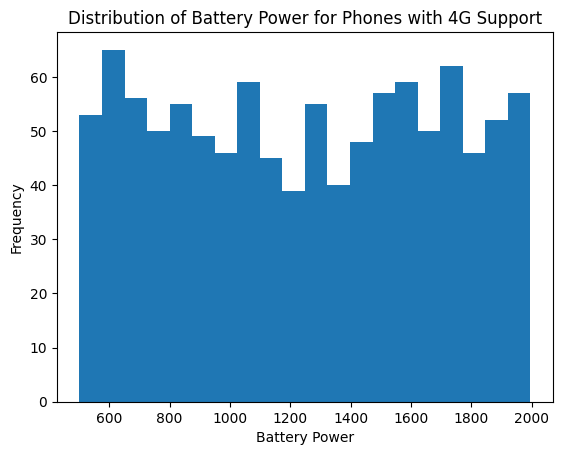

In [ ]:
# Filter the dataset to only include phones with 4G support
four_g = mobile[mobile['four_g'] == 1]

# Retrieve the battery power column from the filtered dataset
battery_power = four_g['battery_power']

# Plot a histogram of the battery power values
plt.hist(battery_power, bins=20)
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power for Phones with 4G Support')
plt.show()

**Is there a correlation between the amount of internal memory and the screen size (sc_h * sc_w)?**


In [ ]:
# Calculate the correlation coefficient between int_memory and sc_h * sc_w
correlation = mobile['int_memory'].corr(mobile['sc_h'] * mobile['sc_w'])

print(f"The correlation coefficient between internal memory and screen size is: {correlation:.2f}")

The correlation coefficient between internal memory and screen size is: 0.02


**What is the distribution of talk time in the dataset?**

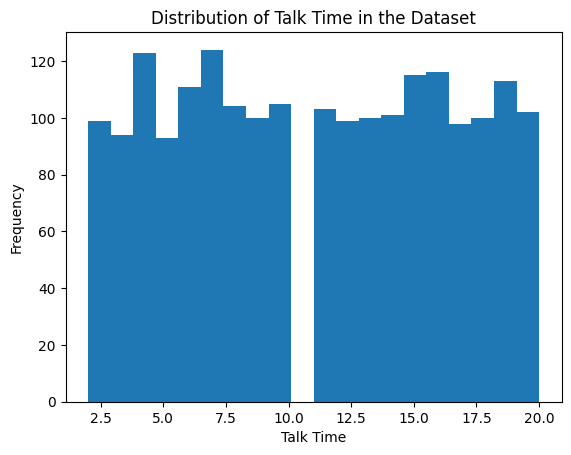

In [ ]:
# Retrieve the talk time column from the dataset
talk_time = mobile['talk_time']

# Plot a histogram of the talk time values
plt.hist(talk_time, bins=20)
plt.xlabel('Talk Time')
plt.ylabel('Frequency')
plt.title('Distribution of Talk Time in the Dataset')
plt.show()

**What is the most common number of cores in the dataset?**


In [ ]:
most_common_cores = mobile['n_cores'].mode()
print(f"The most common number of cores in the dataset is: {most_common_cores.values[0]}")

The most common number of cores in the dataset is: 4
